In [ ]:
print("EHorizon")

EHorizon


In [ ]:
train_data_path = "/content/drive/MyDrive/AI and ML/movie_review_dataset/train_movie_review.csv"
test_data_path = "/content/drive/MyDrive/AI and ML/movie_review_dataset/test_movie_review.csv"
val_data_path = "/content/drive/MyDrive/AI and ML/movie_review_dataset/val_movie_review.csv"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Text Preprocessing

###Data Load

In [ ]:
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)
val_df = pd.read_csv(val_data_path)

In [ ]:
#viewing shapes
print("Train data shape: ", train_df.shape)
print("Test data shape: ", test_df.shape)
print("Validation data shape: ", val_df.shape)

Train data shape:  (35000, 3)
Test data shape:  (10000, 3)
Validation data shape:  (5000, 3)


In [ ]:
#viewing dataset
train_df.head()

,Unnamed: 0,review,sentiment
0,3774,"Having avoided seeing the movie in the cinema,...",0
1,48396,With this movie I was really hoping that the i...,0
2,1980,Raymond Burr stars as an attorney caught up in...,0
3,6703,A lot people get hung up on this films tag as ...,1
4,28168,I was a fan of Buffy and hoped it would come t...,0


In [ ]:
#checking null values
print("-"*30)
print("Train df null values: ", train_df.isnull().sum())
print("-"*30)
print("Test df null values: ", test_df.isnull().sum())
print("-"*30)
print("Validation df null values: ", val_df.isnull().sum())
print("-"*30)


------------------------------
Train df null values:  Unnamed: 0    0
review        0
sentiment     0
dtype: int64
------------------------------
Test df null values:  Unnamed: 0    0
review        0
sentiment     0
dtype: int64
------------------------------
Validation df null values:  Unnamed: 0    0
review        0
sentiment     0
dtype: int64
------------------------------


In [ ]:
#checking duplicated value
print("Train df duplicated values: ", train_df.duplicated().sum())
print("Test df duplicated values: ", test_df.duplicated().sum())
print("Validation df duplicated values: ", val_df.duplicated().sum())

Train df duplicated values:  0
Test df duplicated values:  0
Validation df duplicated values:  0


In [ ]:
#checking types of columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35000 non-null  int64 
 1   review      35000 non-null  object
 2   sentiment   35000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 820.4+ KB


In [ ]:
train_df.dtypes

,0
Unnamed: 0,int64
review,object
sentiment,int64


In [ ]:
#unique sentiment classes
train_df['sentiment'].unique()

array([0, 1])

In [ ]:
train_df['review'][0][:50]

'Having avoided seeing the movie in the cinema, but'

###Data Cleaning

In [ ]:
#texty to lowercase
def lower_case(text):
  return text.lower()

lower_case("Having avoided seeing the movie in the cinema, but")

'having avoided seeing the movie in the cinema, but'

In [ ]:
#applying to train,text and val
train_df['review'] = train_df['review'].apply(lower_case)
test_df['review'] = test_df['review'].apply(lower_case)
val_df['review'] = val_df['review'].apply(lower_case)

In [ ]:
#remove punctuation
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

remove_punctuation("Hello! How are you?")

'Hello How are you'

In [ ]:
#apply to all
train_df['review'] = train_df['review'].apply(remove_punctuation)
test_df['review'] = test_df['review'].apply(remove_punctuation)
val_df['review'] = val_df['review'].apply(remove_punctuation)

In [ ]:
#removing special character
import re

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)        # Remove URLs
    text = re.sub(r"@\w+", '', text)                           # Remove mentions
    text = re.sub(r"#\w+", '', text)                           # Remove hashtags
    text = re.sub(r"\d+", '', text)                            # Remove numbers
    text = re.sub(r"[^\w\s]", '', text)                        # Remove special characters
    return text

text_example = "hello @saurav, today is #funny day to visit 12 http://email.com"
clean_text(text_example)

'hello  today is  day to visit  '

In [ ]:
#applying to train, text and val
train_df['review'] = train_df['review'].apply(clean_text)
test_df['review'] = test_df['review'].apply(clean_text)
val_df['review'] = val_df['review'].apply(clean_text)


In [ ]:
# remove html tags if have any
def remove_html_tag(text):
    text = re.sub(r'<br\s*/?>', ' ', text)  # replaces <br>, <br/>, <br /> with space
    text = re.sub(r'<.*?>', '', text)       # removes any other HTML tags
    text = re.sub(r'\bbr\b', ' ', text) #removing br
    return text

remove_html_tag("<div>hello</div> <br> br this</br> is <p>AI Bot </p>")

'hello     this is AI Bot '

In [ ]:
#applying to all
train_df['review'] = train_df['review'].apply(remove_html_tag)
test_df['review'] = test_df['review'].apply(remove_html_tag)
val_df['review'] = val_df['review'].apply(remove_html_tag)

In [ ]:
#removing empty spaces betwen text
def remove_extra_spaces(text):
    return ' '.join(text.split())

remove_extra_spaces("This code   is on   python")

'This code is on python'

In [ ]:
#apply to all
train_df['review'] = train_df['review'].apply(remove_extra_spaces)
test_df['review'] = test_df['review'].apply(remove_extra_spaces)
val_df['review'] = val_df['review'].apply(remove_extra_spaces)

In [ ]:
#stop word removel
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords


# Load stopwords once
stop_words = set(stopwords.words('english'))

def remove_stopword(text):
    return " ".join([w for w in text.split() if w not in stop_words])


remove_stopword("I am a good boy")

'I good boy'

In [ ]:
#apply to all
train_df['review'] = train_df['review'].apply(remove_stopword)
test_df['review'] = test_df['review'].apply(remove_stopword)
val_df['review'] = val_df['review'].apply(remove_stopword)

In [ ]:
#dropping the first column "Unnamed"
train_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df.drop('Unnamed: 0', axis=1, inplace=True)
val_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#review after clean
train_df.sample(5)

,review,sentiment
2585,lion king serious story young lion growing ave...,1
11124,vast minority also didnt much care original ca...,1
15076,saw film first time older brother one great de...,1
20642,romanticised thoroughly false vision unemploym...,0
14244,one greatest childpet movies ever created cry ...,1


In [ ]:
# lemmitization
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word, pos='v') for word in text.split()]) #pos => part of speech tag

print(lemmatize_text("rain raining rained"))

In [ ]:
#apply to all
train_df['review'] = train_df['review'].apply(lemmatize_text)
test_df['review'] = test_df['review'].apply(lemmatize_text)
val_df['review'] = val_df['review'].apply(lemmatize_text)

###Saving Cleaned Dataset

In [ ]:
#saving cleaned dataset
# train_df.to_csv('cleaned_train_movie_review.csv', index=False)
# test_df.to_csv('cleaned_test_movie_review.csv', index=False)
# val_df.to_csv('cleaned_val_movie_review.csv', index=False)

In [ ]:
#for test (using clean dataset ) direct continue from here - uncomment code below
import pandas as pd
train_df = pd.read_csv('/content/cleaned_train_movie_review.csv')
test_df = pd.read_csv('/content/cleaned_test_movie_review.csv')
val_df = pd.read_csv('/content/cleaned_val_movie_review.csv')

### Visulizing the cleaned data

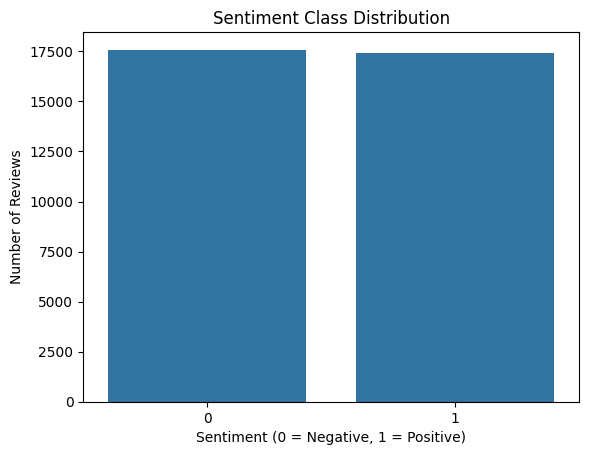

In [ ]:
#class distribution
sns.countplot(data=train_df, x='sentiment')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Number of Reviews')
plt.show()

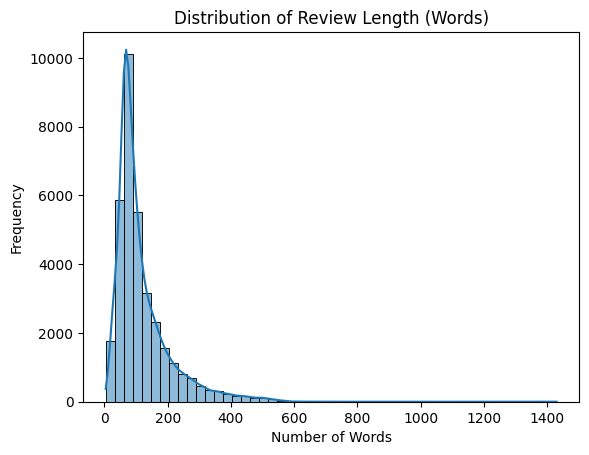

In [ ]:
#review length distribution
train_df['review_length'] = train_df['review'].apply(lambda x: len(x.split()))

sns.histplot(train_df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Length (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


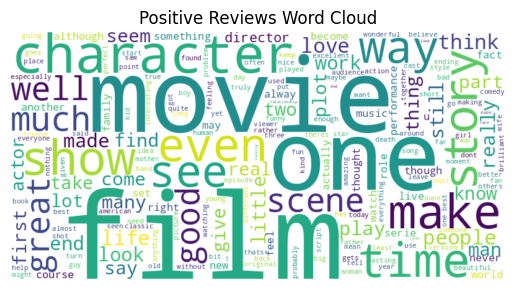

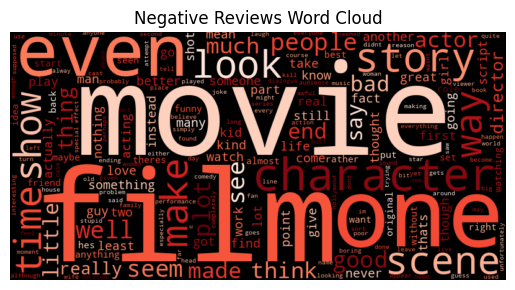

In [ ]:
#word cloud for each sentiment - most frequent words in positive and negitive sentiment
from wordcloud import WordCloud

positive_text = " ".join(train_df[train_df['sentiment'] == 1]['review'])
negative_text = " ".join(train_df[train_df['sentiment'] == 0]['review'])

# Positive
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

# Negative
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()


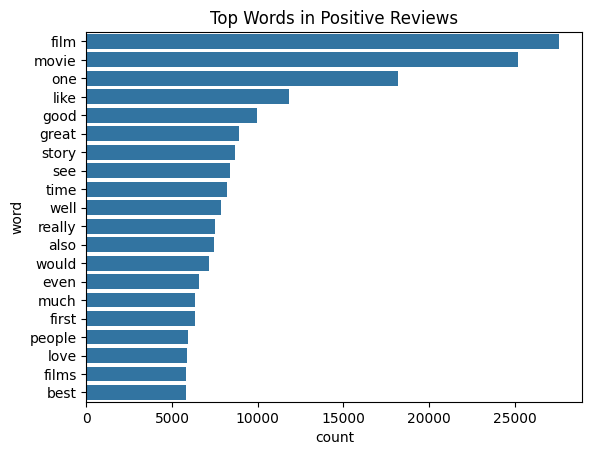

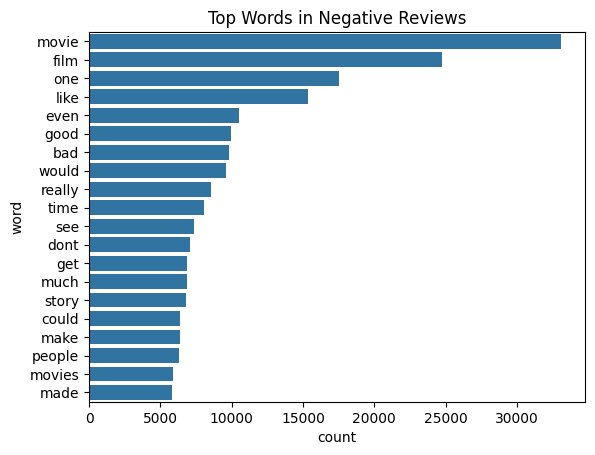

In [ ]:
#most common word per class
from collections import Counter
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def get_top_words(texts, n=20):
    words = " ".join(texts).lower().split()
    words = [w for w in words if w not in stop_words]
    return Counter(words).most_common(n)

# Example: Top words in positive reviews
top_pos = get_top_words(train_df[train_df['sentiment'] == 1]['review'])
top_neg = get_top_words(train_df[train_df['sentiment'] == 0]['review'])

# Convert to DataFrame for plotting
import pandas as pd

pos_df = pd.DataFrame(top_pos, columns=['word', 'count'])
sns.barplot(data=pos_df, x='count', y='word')
plt.title('Top Words in Positive Reviews')
plt.show()

neg_df = pd.DataFrame(top_neg, columns=['word', 'count'])
sns.barplot(data=neg_df, x='count', y='word')
plt.title('Top Words in Negative Reviews')
plt.show()


In [ ]:
train_df.head()

,review,sentiment,review_length
0,avoided seeing movie cinema buying dvd wife xm...,0,144
1,movie really hoping idea make hashed together ...,0,489
2,raymond burr stars attorney caught murder best...,0,118
3,lot people get hung films tag childrens film c...,1,500
4,fan buffy hoped would come proper end angel go...,0,81


##Tokenization And Padding

In [ ]:
# !pip install tensorflow

In [ ]:
# !pip install numpy==1.23.5
# !pip install jax==0.4.13 # If not already installed
# !pip install jaxlib==0.4.13+cuda12.cudnn89 -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html # or your compatible jaxlib
# !pip install jax==0.4.13

In [ ]:
#imports
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:


# Sample text data
texts = [
    "i love this movie i is best",
    "this is worse movie",
    "i can watch this movie thousand time in my entire life"
]

# Step 1: Initialize the tokenizer
tokenizer = Tokenizer()

# Step 2: Fit the tokenizer on your text data
tokenizer.fit_on_texts(texts)

# Step 3: Convert the text to integer sequences
sequences = tokenizer.texts_to_sequences(texts)

# Print the integer sequences
print("Integer Sequences:")
for seq in sequences:
    print(seq)

# If you want to see the mapping of words to integers:
print("\nWord Index Mapping:")
print(tokenizer.word_index)


# Padding Part

# Step 4: Padding the sequences to ensure they all have the same length
# You can set maxlen to control the sequence length after padding.
padded_sequences = pad_sequences(sequences, padding='post')  # 'post' adds padding at the end of the sequence

# Print the padded sequences
print("\nPadded Sequences:")
for seq in padded_sequences:
    print(seq)

# If you want to see the mapping of words to integers:
print("\nWord Index Mapping:")
print(tokenizer.word_index)


Integer Sequences:
[1, 5, 2, 3, 1, 4, 6]
[2, 4, 7, 3]
[1, 8, 9, 2, 3, 10, 11, 12, 13, 14, 15]

Word Index Mapping:
{'i': 1, 'this': 2, 'movie': 3, 'is': 4, 'love': 5, 'best': 6, 'worse': 7, 'can': 8, 'watch': 9, 'thousand': 10, 'time': 11, 'in': 12, 'my': 13, 'entire': 14, 'life': 15}

Padded Sequences:
[1 5 2 3 1 4 6 0 0 0 0]
[2 4 7 3 0 0 0 0 0 0 0]
[ 1  8  9  2  3 10 11 12 13 14 15]

Word Index Mapping:
{'i': 1, 'this': 2, 'movie': 3, 'is': 4, 'love': 5, 'best': 6, 'worse': 7, 'can': 8, 'watch': 9, 'thousand': 10, 'time': 11, 'in': 12, 'my': 13, 'entire': 14, 'life': 15}


In [ ]:
train_df.head()

,review,sentiment,review_length
0,avoided seeing movie cinema buying dvd wife xm...,0,144
1,movie really hoping idea make hashed together ...,0,489
2,raymond burr stars attorney caught murder best...,0,118
3,lot people get hung films tag childrens film c...,1,500
4,fan buffy hoped would come proper end angel go...,0,81


In [ ]:
train_df.shape

(35000, 3)

In [ ]:
X_train = train_df['review']
y_train = train_df['sentiment']
X_test = test_df['review']
y_test = test_df['sentiment']
X_val = val_df['review']
y_val = val_df['sentiment']

In [ ]:
#making data ready

# First, fit a tokenizer without limiting vocabulary to see total word count
initial_tokenizer = Tokenizer(oov_token='<OOV>')
initial_tokenizer.fit_on_texts(X_train)
total_words = len(initial_tokenizer.word_index)
print(f"Total unique words in dataset: {total_words}")

Total unique words in dataset: 143571


In [ ]:
# Create word frequency distribution to help decide vocab_size
word_counts = pd.Series(dict([(word, count) for word, count in initial_tokenizer.word_counts.items()]))
word_counts = word_counts.sort_values(ascending=False)

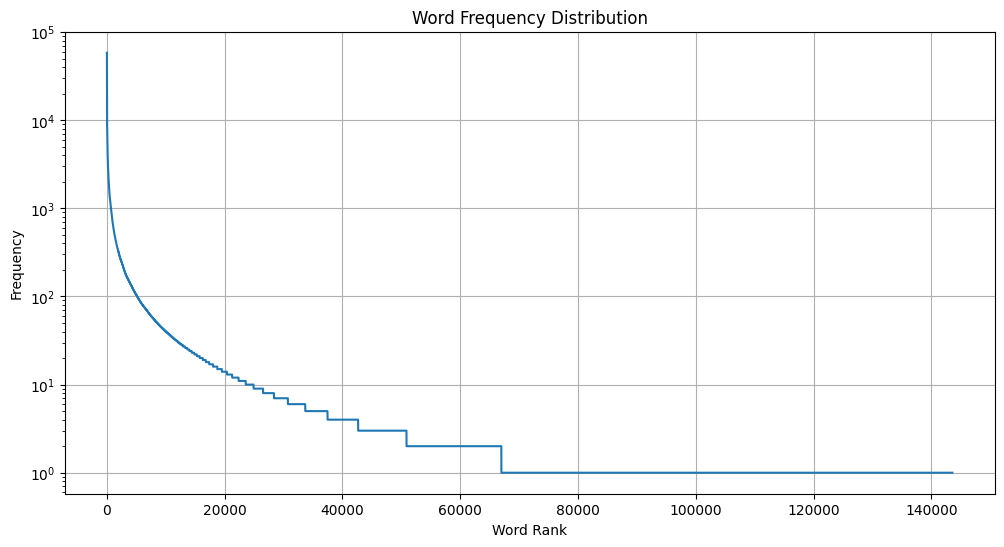

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(word_counts.values)
plt.title('Word Frequency Distribution')
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(True)
plt.show()

In [ ]:
coverage_percentages = []
vocab_sizes = [10000, 20000, 30000, 40000, 50000, 70000,100000, total_words]
word_counts_cumsum = word_counts.cumsum()
total_word_occurrences = word_counts.sum()

for size in vocab_sizes:
    if size <= len(word_counts):
        coverage = word_counts_cumsum.iloc[min(size-1, len(word_counts)-1)] / total_word_occurrences * 100
    else:
        coverage = 100.0
    coverage_percentages.append(coverage)
    print(f"Vocab size {size}: covers {coverage:.2f}% of all word occurrences")

# 6. Choose a reasonable vocab_size based on coverage
# A common rule is to choose the size that covers 95-98% of word occurrences
vocab_size = next((size for size, coverage in zip(vocab_sizes, coverage_percentages)
                  if coverage >= 95), 10000)
print(f"\nRecommended vocab_size: {vocab_size} (covers ≥95% of text)")

Vocab size 10000: covers 87.29% of all word occurrences
Vocab size 20000: covers 92.96% of all word occurrences
Vocab size 30000: covers 95.30% of all word occurrences
Vocab size 40000: covers 96.54% of all word occurrences
Vocab size 50000: covers 97.32% of all word occurrences
Vocab size 70000: covers 98.23% of all word occurrences
Vocab size 100000: covers 98.95% of all word occurrences
Vocab size 143571: covers 100.00% of all word occurrences

Recommended vocab_size: 30000 (covers ≥95% of text)


In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print(f"Using {min(vocab_size, len(word_index))} words out of {len(word_index)} unique tokens")

Using 30000 words out of 143571 unique tokens


In [ ]:
# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)
val_sequences = tokenizer.texts_to_sequences(X_val)

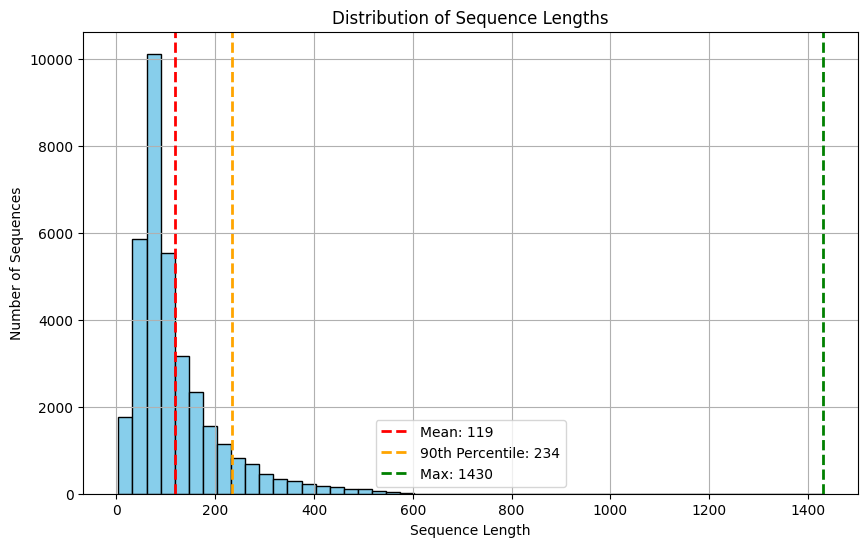

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have 'lengths'
lengths = [len(seq) for seq in train_sequences]

plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Number of Sequences")

# Add lines for mean, 90th percentile, and max
plt.axvline(np.mean(lengths), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {np.mean(lengths):.0f}")
plt.axvline(np.percentile(lengths, 90), color='orange', linestyle='dashed', linewidth=2, label=f"90th Percentile: {int(np.percentile(lengths, 90))}")
plt.axvline(max(lengths), color='green', linestyle='dashed', linewidth=2, label=f"Max: {max(lengths)}")

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
max_length = int(np.percentile(lengths, 90))
print("max length:", max_length)

max length: 234


In [ ]:
#Pad sequences to ensure uniform length
X_pad = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
y_pad = np.array(y_train)
X_test_pad = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')
y_test_pad = np.array(y_test)
X_val_pad = pad_sequences(val_sequences, maxlen=max_length, padding='post', truncating='post')
y_val_pad = np.array(y_val)

In [ ]:
print("X shape after pad", X_pad.shape)
print("y shape after pad", y_pad.shape)

X shape after pad (35000, 234)
y shape after pad (35000,)


In [ ]:
print("In text: ",X_train[10])
print("In numerical Sequence: ",train_sequences[10])
print("In numerical Padded Sequence: ",X_pad[10])
print("Sentiment:",y_pad[10])

In text:  although im crazy musicals cover girl delight classic movie buffs especially fans rita hayworth gene kelly film may dated todays standards story songs may nothing special musical numbers magnificently staged theres terrific cast go film plus film worthy introduction fans rita hayworthshes simply breathtaking glorious technicolorbr   despite jerome kerns collaboration film music nowhere near special memorable songs swing time yet songs serve film well dancing nothing short excellent especially coming gene kellys solo number favorite musical number alterego dance amusing phil silvers nearly steals film kellys partner otto kruger eve arden edward brophy give good performances dramatic supporting roles rita plays sweet charming girl role thats far cry femme fatale babes films like blood sand     delightful film thats worth watching even youre big musicals yet films music could memorable favorite period songwriters irving berlin cole porter wrote songs film however glorious techni

##Model Training

In [ ]:
#imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM,Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
#constants | hyperparameters
# Hyperparameters
vocab_size = vocab_size   #vocab size given on tokenization part
embedding_dim = 100    # word embedding dimensions
maxlen = max_length           # maxlen from above

####Simple RNN

In [ ]:

simple_rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])


####LSTM

In [ ]:

lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

####LSTM with Word2Vec Embedding

In [ ]:
# !pip install numpy==1.23.5
# !pip install gensim
# !pip install jax==0.4.13

In [ ]:
import gensim.downloader as gensim_downloader
from tensorflow.keras.initializers import Constant

In [ ]:
def create_embedding_matrix(word_index, embedding_dim=100):
    """Create embedding matrix from pre-trained Word2Vec embeddings"""
    try:
        # Load pre-trained Word2Vec embeddings
        print("Loading Word2Vec embeddings...")
        word_vectors = gensim_downloader.load('word2vec-google-news-300')
        embedding_dim = 300  # Word2Vec has 300-dimensional vectors
        print("Word2Vec embeddings loaded!")
    except Exception as e:
        print(f"Error loading Word2Vec: {e}")
        print("Falling back to GloVe embeddings...")
        word_vectors = gensim_downloader.load('glove-wiki-gigaword-100')
        embedding_dim = 100  # GloVe has 100-dimensional vectors
        print("GloVe embeddings loaded!")

    # Initialize embedding matrix with zeros
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

    # Fill embedding matrix with Word2Vec values
    count = 0
    for word, i in word_index.items():
        try:
            if word in word_vectors:
                embedding_matrix[i] = word_vectors[word]
                count += 1
        except:
            continue

    print(f"Found embeddings for {count}/{len(word_index)} words")
    return embedding_matrix, embedding_dim

In [ ]:
# Create embedding matrix
embedding_matrix, embedding_dim = create_embedding_matrix(word_index)

Loading Word2Vec embeddings...
Word2Vec embeddings loaded!
Found embeddings for 55291/143571 words


In [ ]:
lstm_w2v_model = Sequential([
    Embedding(
        input_dim=len(word_index) + 1,
        output_dim=embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        # input_length=max_length,
        trainable=False
    ),
    LSTM(64),
    Dense(1, activation='sigmoid')
])




##Model Evaluation

###Compile

In [ ]:
# simple rnn
simple_rnn_model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)


#callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
# lstm
lstm_model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

#callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [ ]:
# lstm-w2v
lstm_w2v_model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

#callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

###Train

In [ ]:
history1 = simple_rnn_model.fit(
    X_pad, y_pad,
    validation_data=(X_val_pad, y_val_pad),
    epochs=10,
    batch_size=64,
    callbacks=[early_stop]
)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.5028 - loss: 0.6956 - val_accuracy: 0.4948 - val_loss: 0.6959
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.5414 - loss: 0.6668 - val_accuracy: 0.4954 - val_loss: 0.7208
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.5571 - loss: 0.6195 - val_accuracy: 0.5104 - val_loss: 0.7280


In [ ]:
simple_rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 234, 128)       │     3,840,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,557,253 (44.09 MB)

 Trainable params: 3,852,417 (14.70 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,704,836 (29.39 MB)

In [ ]:
history2 = lstm_model.fit(
    X_pad, y_pad,
    validation_data=(X_val_pad, y_val_pad),
    epochs=15,
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5097 - loss: 0.6934 - val_accuracy: 0.4984 - val_loss: 0.6930
Epoch 2/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5311 - loss: 0.6821 - val_accuracy: 0.5254 - val_loss: 0.6776
Epoch 3/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.5840 - loss: 0.6221 - val_accuracy: 0.7834 - val_loss: 0.5081
Epoch 4/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8459 - loss: 0.3846 - val_accuracy: 0.8606 - val_loss: 0.3504
Epoch 5/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9294 - loss: 0.2037 - val_accuracy: 0.8660 - val_loss: 0.3333
Epoch 6/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9656 - loss: 0.1182 - val_accuracy: 0.8680 - val_loss: 0.4001
Epoch 7/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9837 - loss: 0.0663 - val_accuracy: 0.8604 - val_loss: 0.4177


In [ ]:
lstm_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 234, 100)       │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,126,917 (34.82 MB)

 Trainable params: 3,042,305 (11.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,084,612 (23.21 MB)

In [ ]:
history3 = lstm_w2v_model.fit(
    X_pad, y_pad,
    validation_data=(X_val_pad, y_val_pad),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop]
)



Epoch 1/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.5246 - loss: 0.6842 - val_accuracy: 0.8018 - val_loss: 0.4796
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8085 - loss: 0.4511 - val_accuracy: 0.8390 - val_loss: 0.3761
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8400 - loss: 0.3770 - val_accuracy: 0.8478 - val_loss: 0.3618
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8498 - loss: 0.3556 - val_accuracy: 0.8550 - val_loss: 0.3444
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8551 - loss: 0.3410 - val_accuracy: 0.8534 - val_loss: 0.3484
Epoch 6/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8588 - loss: 0.3329 - val_accuracy: 0.8540 - val_loss: 0.3390
Epoch 7/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8640 - loss: 0.3256 - val_accuracy: 0.8554 - val_loss: 0.3365
Epoch 8/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8664 - loss: 0.3147 - val

In [ ]:
lstm_w2v_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 234, 300)       │    43,071,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        93,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,352,117 (165.38 MB)

 Trainable params: 93,505 (365.25 KB)

 Non-trainable params: 43,071,600 (164.31 MB)

 Optimizer params: 187,012 (730.52 KB)

###Visulization

In [ ]:

import matplotlib.pyplot as plt

def plot_history(history, model_name="model"):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()



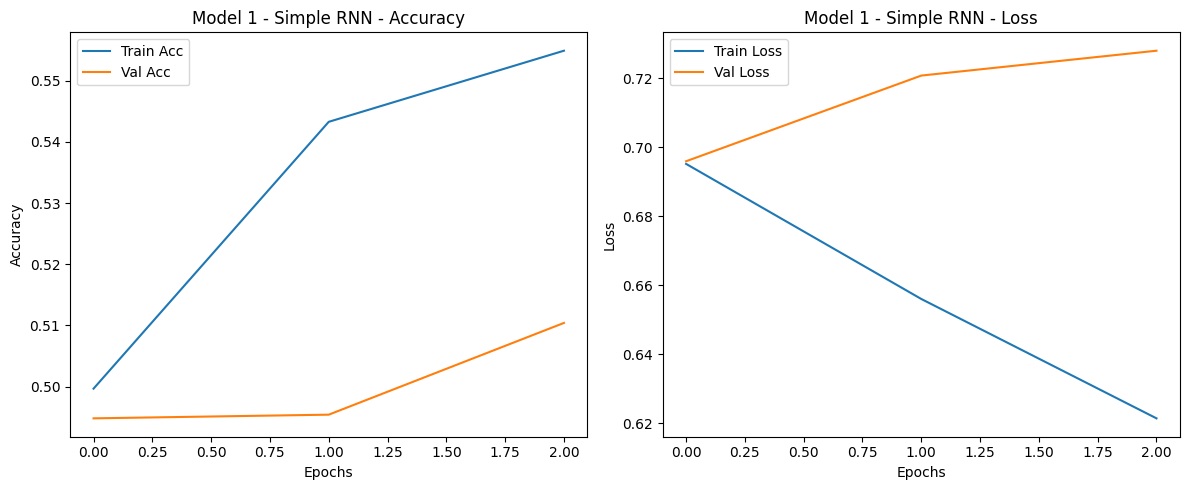

In [ ]:
# Model 1

plot_history(history1, "Model 1 - Simple RNN")

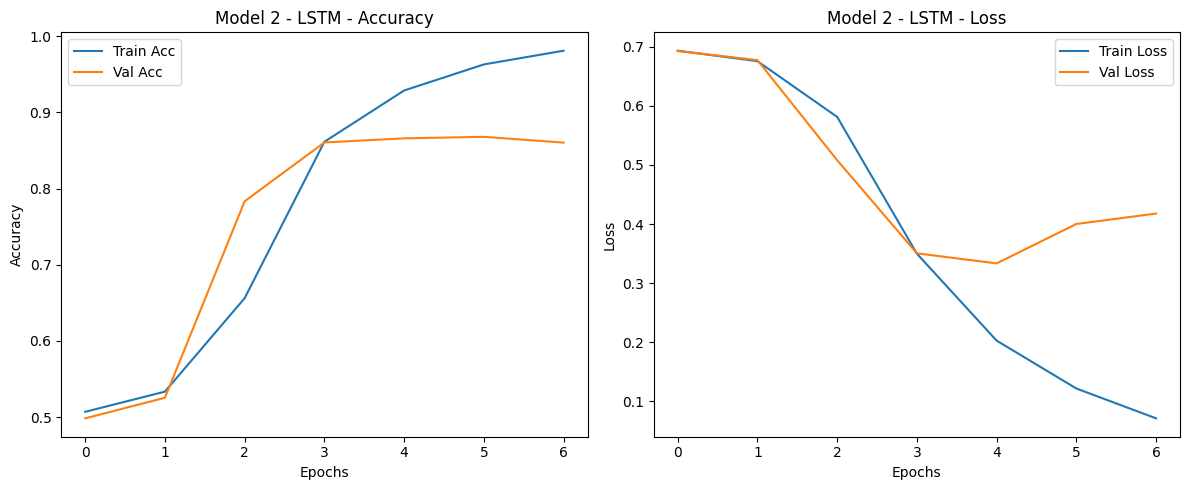

In [ ]:
# Model 2

plot_history(history2, "Model 2 - LSTM")

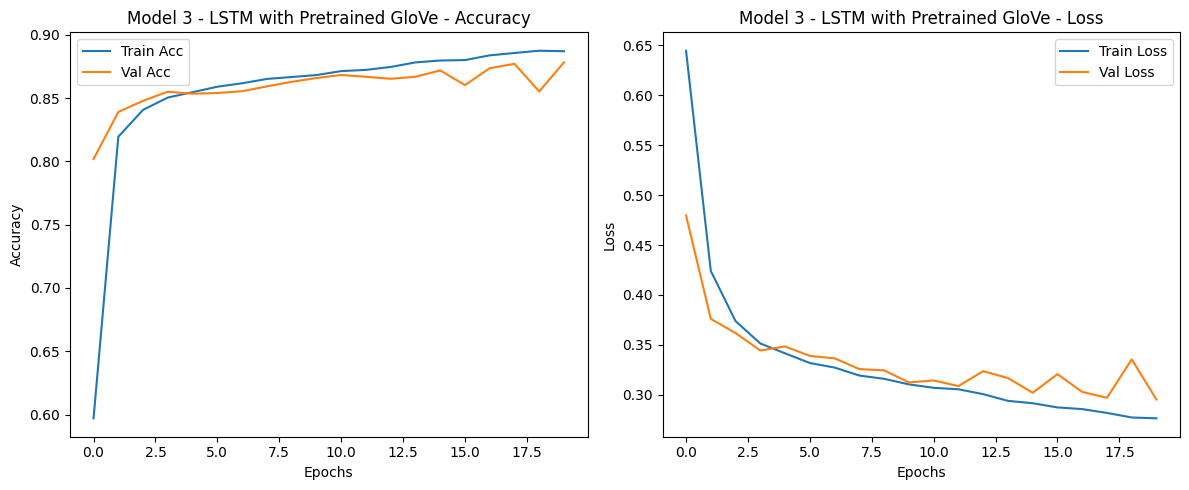

In [ ]:
plot_history(history3, "Model 3 - LSTM with Pretrained GloVe")

###Compare

In [ ]:
# Print final epoch results
print("Model 1 - RNN:")
print(f"Train Acc: {history1.history['accuracy'][-1]}, Val Acc: {history1.history['val_accuracy'][-1]}")
print()

print("Model 2 - LSTM (Trainable Embedding):")
print(f"Train Acc: {history2.history['accuracy'][-1]}, Val Acc: {history2.history['val_accuracy'][-1]}")
print()

print("Model 3 - LSTM (Pretrained Embedding):")
print(f"Train Acc: {history3.history['accuracy'][-1]}, Val Acc: {history3.history['val_accuracy'][-1]}")


Model 1 - RNN:
Train Acc: 0.5549142956733704, Val Acc: 0.5103999972343445

Model 2 - LSTM (Trainable Embedding):
Train Acc: 0.9810571670532227, Val Acc: 0.8604000210762024

Model 3 - LSTM (Pretrained Embedding):
Train Acc: 0.8869714140892029, Val Acc: 0.8781999945640564


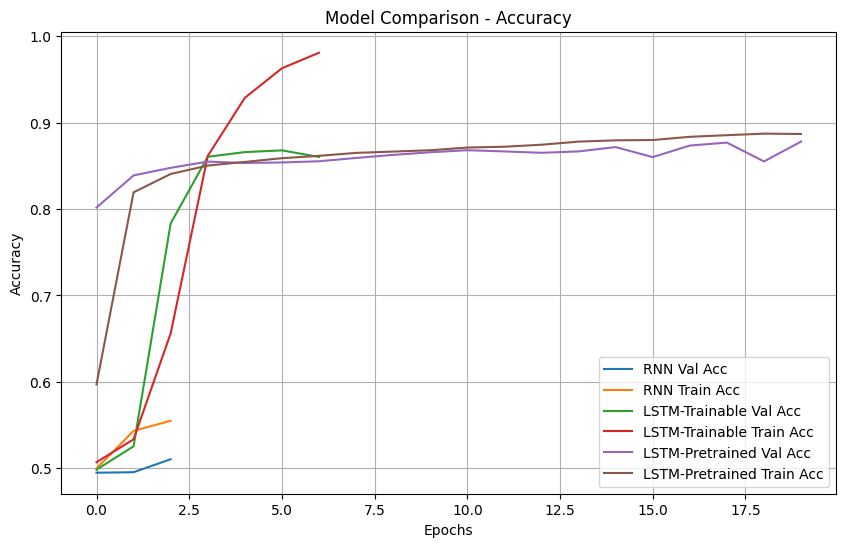

In [ ]:
import matplotlib.pyplot as plt

def plot_model_history(history, label):
    plt.plot(history.history['val_accuracy'], label=f'{label} Val Acc')
    plt.plot(history.history['accuracy'], label=f'{label} Train Acc')

plt.figure(figsize=(10, 6))
plot_model_history(history1, 'RNN')
plot_model_history(history2, 'LSTM-Trainable')
plot_model_history(history3, 'LSTM-Pretrained')
plt.title('Model Comparison - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


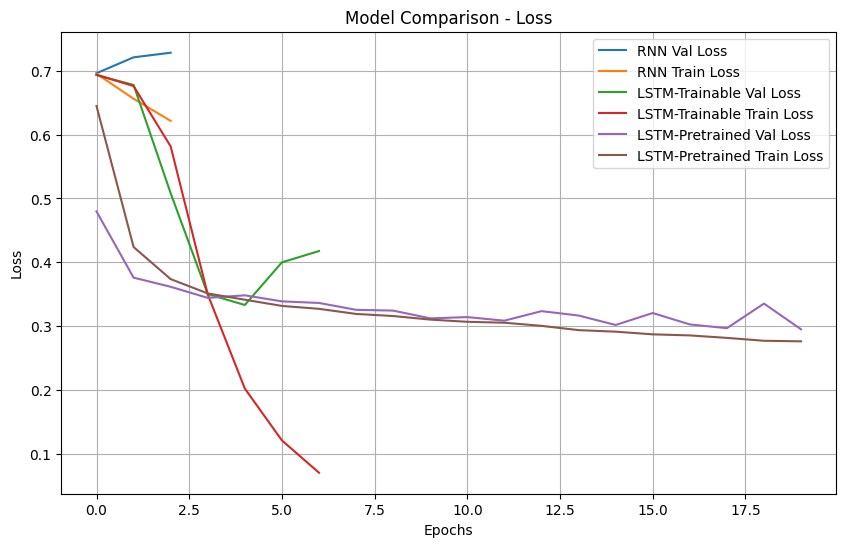

In [ ]:
def plot_loss(history, label):
    plt.plot(history.history['val_loss'], label=f'{label} Val Loss')
    plt.plot(history.history['loss'], label=f'{label} Train Loss')

plt.figure(figsize=(10, 6))
plot_loss(history1, 'RNN')
plot_loss(history2, 'LSTM-Trainable')
plot_loss(history3, 'LSTM-Pretrained')
plt.title('Model Comparison - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


####Evaluation

####Model -1

In [ ]:
# Model 1
# Evaluate - test
test_loss_1, test_acc_1 = simple_rnn_model.evaluate(X_test_pad, y_test_pad)
print(f"\nTest Accuracy: {test_acc_1:.4f}")

# Classification report
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = simple_rnn_model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test_pad, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_pad, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5022 - loss: 0.6952

Test Accuracy: 0.5017
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.93      0.65      4961
           1       0.54      0.08      0.14      5039

    accuracy                           0.50     10000
   macro avg       0.52      0.51      0.40     10000
weighted avg       0.52      0.50      0.39     10000


Confusion Matrix:
[[4608  353]
 [4630  409]]


In [ ]:
# Model 1
# Evaluate - train
train_loss_1, train_acc_1 = simple_rnn_model.evaluate(X_pad, y_pad)
print(f"\nTrain Accuracy: {train_acc_1:.4f}")

# Classification report
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = simple_rnn_model.predict(X_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_pad, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_pad, y_pred))


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5524 - loss: 0.6775

Train Accuracy: 0.5554
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.99      0.69     17584
           1       0.95      0.11      0.20     17416

    accuracy                           0.56     35000
   macro avg       0.74      0.55      0.45     35000
weighted avg       0.74      0.56      0.45     35000


Confusion Matrix:
[[17482   102]
 [15458  1958]]


####Model -2

In [ ]:
#Model 2

# Evaluate - train
train_loss_2, train_acc_2 = lstm_model.evaluate(X_pad, y_pad)
print(f"\nTrain Accuracy: {train_acc_1:.4f}")

# Classification report
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = lstm_model.predict(X_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_pad, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_pad, y_pred))

1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9674 - loss: 0.1270

Train Accuracy: 0.5554
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17584
           1       0.97      0.96      0.97     17416

    accuracy                           0.97     35000
   macro avg       0.97      0.97      0.97     35000
weighted avg       0.97      0.97      0.97     35000


Confusion Matrix:
[[17095   489]
 [  670 16746]]


In [ ]:
#Model 2
# Accuracy
test_loss_2, test_acc_2 = lstm_model.evaluate(X_test_pad, y_test_pad)
print(f"\nTest Accuracy: {train_acc_1:.4f}")

# Classification report
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = lstm_model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test_pad, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_pad, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8798 - loss: 0.3069

Train Accuracy: 0.5554
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4961
           1       0.89      0.86      0.87      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Confusion Matrix:
[[4422  539]
 [ 703 4336]]


####Model-3

In [ ]:
#train data

# Evaluate - train
train_loss_3, train_acc_3 = lstm_w2v_model.evaluate(X_pad, y_pad)
print(f"\nTrain Accuracy: {train_acc_1:.4f}")

# Classification report
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = lstm_w2v_model.predict(X_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_pad, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_pad, y_pred))

1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8970 - loss: 0.2574

Train Accuracy: 0.5554
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     17584
           1       0.89      0.90      0.89     17416

    accuracy                           0.89     35000
   macro avg       0.89      0.89      0.89     35000
weighted avg       0.89      0.89      0.89     35000


Confusion Matrix:
[[15671  1913]
 [ 1793 15623]]


In [ ]:
# test data
# Accuracy
test_loss_3, test_acc_3 = lstm_w2v_model.evaluate(X_test_pad, y_test_pad)
print(f"\nTest Accuracy: {train_acc_1:.4f}")

# Classification report
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = lstm_w2v_model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test_pad, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_pad, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8820 - loss: 0.2932

Train Accuracy: 0.5554
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4961
           1       0.88      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Confusion Matrix:
[[4344  617]
 [ 602 4437]]


In [ ]:
data = {
    'Model': ['Simple RNN', 'LSTM ', 'LSTM with word2vec'],
    'Train Accuracy': [train_acc_1, train_acc_2, train_acc_3],
    'Test Accuracy': [test_acc_1, test_acc_2, test_acc_3],
    'Train Loss': [train_loss_1, train_loss_2, train_loss_3],
    'Test Loss': [test_loss_1, test_loss_2, test_loss_3],
    'Notes': ['Baseline RNN', 'LSTM', 'LSTM with word2vec']
}

df = pd.DataFrame(data)
df

,Model,Train Accuracy,Test Accuracy,Train Loss,Test Loss,Notes
0,Simple RNN,0.555429,0.5017,0.677033,0.695383,Baseline RNN
1,LSTM,0.966886,0.8758,0.128073,0.312296,LSTM
2,LSTM with word2vec,0.894114,0.8781,0.262642,0.296981,LSTM with word2vec


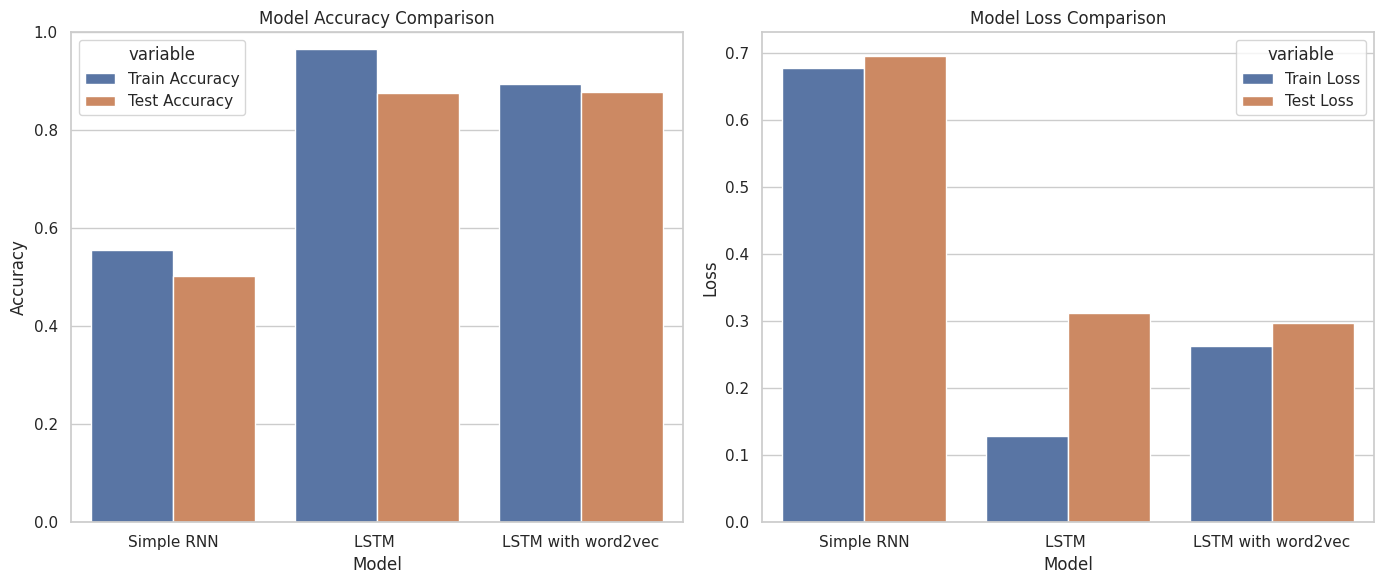

In [ ]:
import seaborn as sns
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
sns.barplot(x="Model", y="value", hue="variable",
            data=pd.melt(df, id_vars="Model", value_vars=["Train Accuracy", "Test Accuracy"]))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

# Loss Plot
plt.subplot(1, 2, 2)
sns.barplot(x="Model", y="value", hue="variable",
            data=pd.melt(df, id_vars="Model", value_vars=["Train Loss", "Test Loss"]))
plt.title("Model Loss Comparison")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

###Model Save

In [ ]:
#model1
simple_rnn_model.save('simple_rnnl.keras')
#model2
lstm_model.save('simple_lstm.keras')
#model3
lstm_w2v_model.save('simple_lstm_w2v.keras')

In [ ]:
#tokenizer
import pickle

# Save tokenizer to file
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
